In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

datadf = pd.read_csv('data/data-and-metrics.csv')

def plotMetric(metric):
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=metric, 
                        y="timetaken", 
                        hue="target", 
                        data=datadf, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=5, 
                        aspect=3)

    ticks = chart.axes[0][0].get_xticks()
    xlabels = ["{:1.0f}".format(float(s)) for s in ticks]
    chart.set_xticklabels(xlabels)
    chart.set_xticklabels(rotation=90)
    sns.reset_orig()
    return chart


def plotMetricq(metric):
    datadf['q_rank'] = pd.qcut(datadf[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadf, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=5, 
                        aspect=3)
    
    ticks = chart.axes[0][0].get_xticks()
    xlabels = ["{:1.0f}".format(float(s)) for s in ticks]
    chart.set_xticklabels(xlabels)
    chart.set_xticklabels(rotation=90)
    sns.reset_orig()
    return chart


def plotMetricByBasemap(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()  
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x=metric, 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=5, 
                        aspect=3)
    sns.reset_orig()
    return chart

def plotMetricByBasemapq(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()   
    datadfLim['q_rank'] = pd.qcut(datadfLim[metric], 10, labels = False) 
    plt.figure(figsize=(15,5))
    chart = sns.catplot(x='q_rank', 
                        y="timetaken", 
                        hue="target", 
                        data=datadfLim, 
                        kind="point",
                        hue_order=["gestalt","less gestalt","no target"],
                        ci=None,
                        height=5, 
                        aspect=3)
    sns.reset_orig()
    return chart



def plotKDEMetric(metric):
    grouped_single = datadf.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(15)
    chart.fig.set_figheight(5)
    sns.reset_orig()
    return chart

def plotKDEMetricByBasemap(metric, basemap):
    datadfLim = datadf.loc[datadf['basemap'] == basemap]
    datadfLim = datadfLim.reset_index()
    grouped_single = datadfLim.groupby([metric, 'target']).agg({'timetaken': ['mean'],'correct': ['mean']})
    grouped_single = grouped_single.reset_index()
    grouped_single.columns = [metric, 'target','timetaken_mean', 'correct_mean']
    sns.set(rc={'axes.facecolor':'#073467', 'axes.grid' : False})
    chart = sns.FacetGrid(grouped_single, 
                          col="target",
                          col_order=["gestalt","less gestalt","no target"])
    chart.map(sns.kdeplot, metric,'timetaken_mean', fill=True, thresh=0, levels=100, cmap='RdBu_r' )
    chart.fig.set_figwidth(15)
    chart.fig.set_figheight(5)
    sns.reset_orig()
    return chart

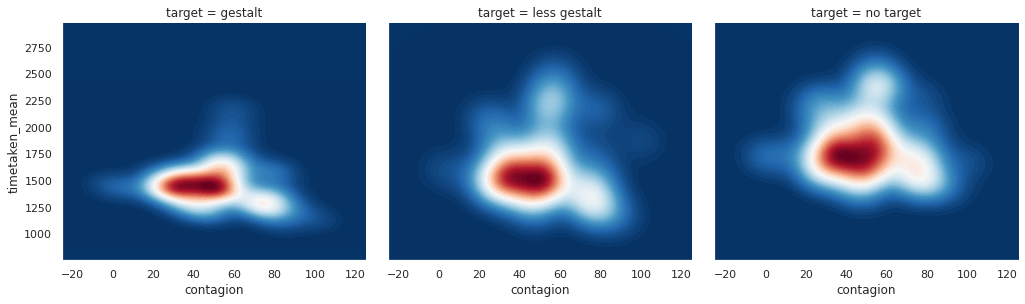

In [2]:
chart = plotKDEMetric('contagion')

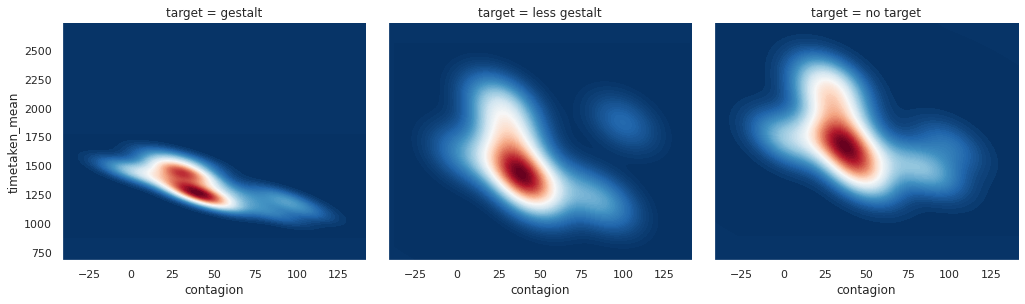

In [3]:
chart = plotKDEMetricByBasemap('contagion', 'none')


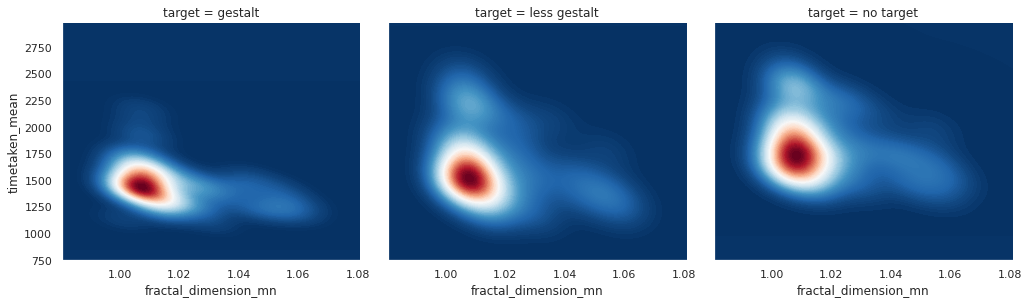

In [4]:
chart = plotKDEMetric('fractal_dimension_mn')

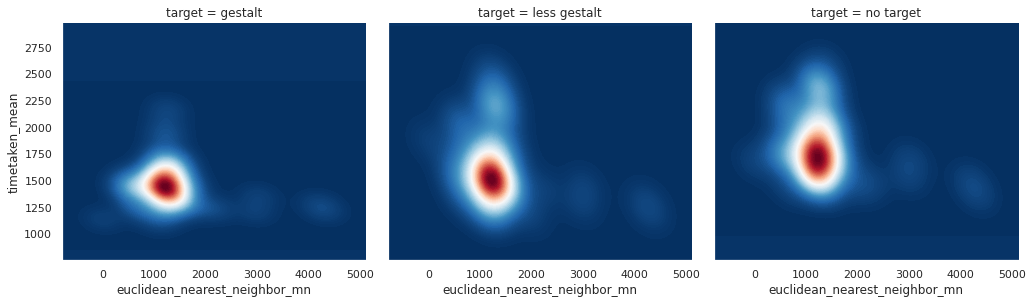

In [5]:
chart = plotKDEMetric('euclidean_nearest_neighbor_mn')

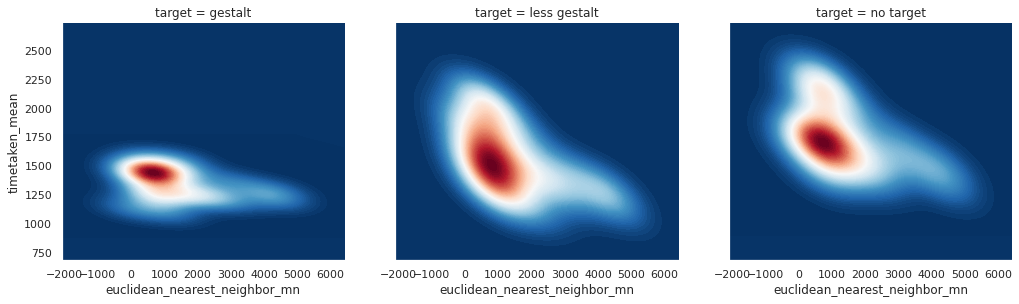

In [6]:
chart = plotKDEMetricByBasemap('euclidean_nearest_neighbor_mn', 'none')


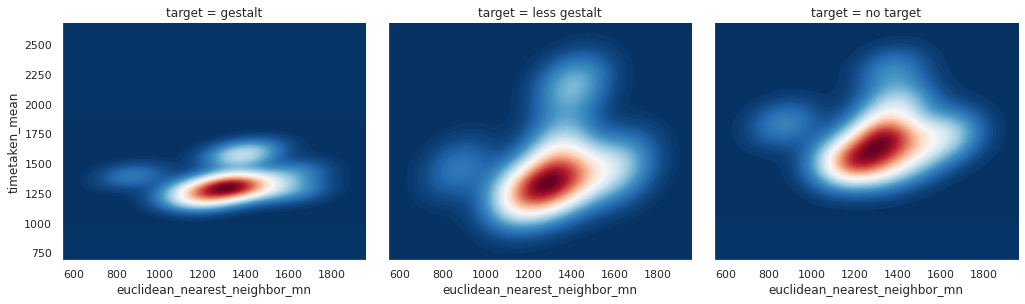

In [7]:
chart = plotKDEMetricByBasemap('euclidean_nearest_neighbor_mn', 'dark')


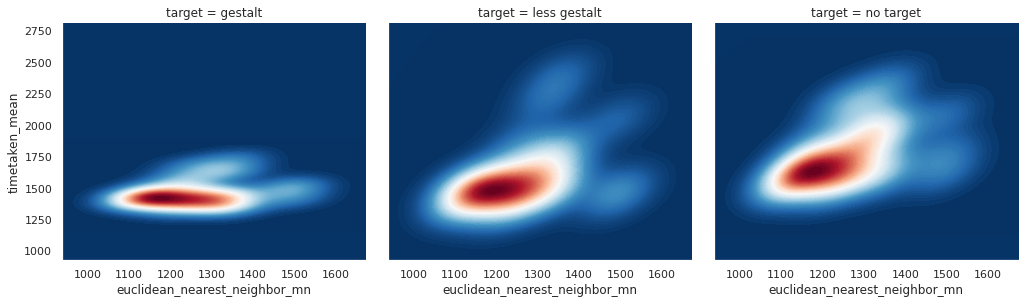

In [8]:
chart = plotKDEMetricByBasemap('euclidean_nearest_neighbor_mn', 'imagery')


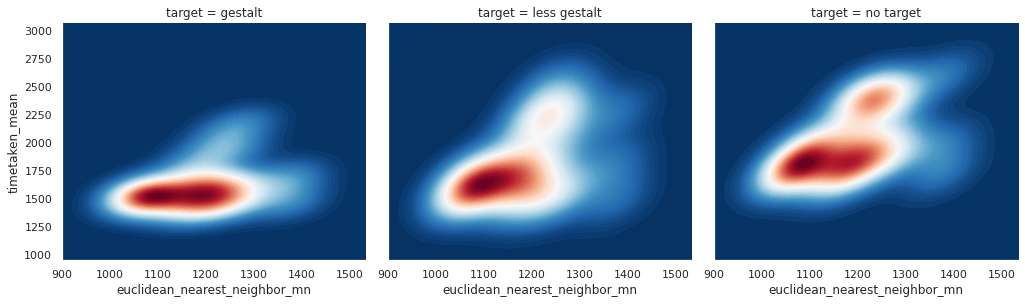

In [9]:
chart = plotKDEMetricByBasemap('euclidean_nearest_neighbor_mn', 'streets')


In [10]:
datadfLim = datadf.loc[datadf['basemap'] == 'none']
# datadfLim = datadf[datadf["basemap"]  == 'none']
datadfLim = datadfLim.reset_index()
datadfLim['q_rank'] = pd.qcut(datadfLim['contagion'], 5, labels = False) 
datadfLim['q_rank']
#     datadf = datadf.assign(Quartile=rank.values)

0        0
1        3
2        0
3        0
4        0
        ..
29886    4
29887    0
29888    4
29889    3
29890    4
Name: q_rank, Length: 29891, dtype: int64